In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

beauty = pd.read_csv("C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/beauty_data_info_train_competition.csv")
beauty_test = pd.read_csv("C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/beauty_data_info_val_competition.csv")
beauty.shape

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(286583, 8)

In [2]:
beauty.head()

,itemid,title,image_path,Benefits,Brand,Colour_group,Product_texture,Skin_type
0,307504,nyx sex bomb pallete natural palette,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg,1.0,157.0,NaN,NaN,NaN
1,461203,etude house precious mineral any cushion pearl...,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg,NaN,73.0,11.0,7.0,NaN
2,3592295,milani rose powder blush,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg,NaN,393.0,20.0,6.0,NaN
3,4460167,etude house baby sweet sugar powder,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg,NaN,73.0,NaN,6.0,NaN
4,5853995,bedak revlon color stay aqua mineral make up,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg,3.0,47.0,NaN,6.0,NaN


# 1. Benefits

In [3]:
be = ['title', 'Benefits']
beauty_be = beauty[be]

#remove missing values
beauty_be = beauty_be[pd.notnull(beauty_be['Benefits'])]
beauty_be = beauty_be[['title', 'Benefits']].sort_values('Benefits')
beauty_be_id = dict(beauty_be.values)
beauty_be.shape

(113556, 2)

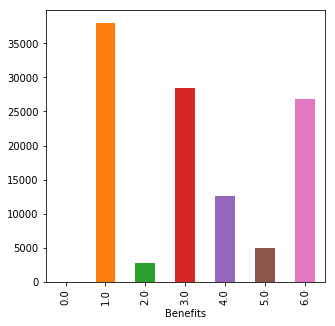

Benefits
0.0       12
1.0    37955
2.0     2841
3.0    28419
4.0    12577
5.0     4930
6.0    26822
Name: title, dtype: int64

In [4]:
fig = plt.figure(figsize = (5,5))
beauty_be.groupby(['Benefits'])['title'].count().plot.bar(ylim = 0)
plt.show()
beauty_be.groupby('Benefits')['title'].count()

In [5]:
#MultinomialNB

y = beauty_be['Benefits']
X = beauty_be['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.79
#low accuracy and recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.86
#high accuracy and recall for minority group 

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.91
#high accuracy and recall for minority group  

#Conclusion: LinearSVC and Random Forest are comparable but Random Forest has higher accuracy and recall for all.

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         6
        1.0       0.78      0.81      0.80     15097
        2.0       0.82      0.76      0.79      1130
        3.0       0.78      0.71      0.74     11380
        4.0       0.73      0.68      0.71      5006
        5.0       0.91      0.73      0.81      2031
        6.0       0.81      0.92      0.86     10773

avg / total       0.79      0.79      0.79     45423
 



C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         6
        1.0       0.81      0.88      0.85     15097
        2.0       0.90      0.87      0.88      1130
        3.0       0.82      0.80      0.81     11380
        4.0       0.84      0.76      0.80      5006
        5.0       0.94      0.82      0.88      2031
        6.0       0.93      0.91      0.92     10773

avg / total       0.85      0.85      0.85     45423
 

Random Forest Classifier
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         6
        1.0       0.83      0.89      0.86     15097
        2.0       0.92      0.85      0.89      1130
        3.0       0.84      0.83      0.84     11380
        4.0       0.86      0.79      0.83      5006
        5.0       0.94      0.84      0.88      2031
        6.0       0.93      0.92      0.92     10773

avg / total       0.87      0.87      0.87     45423
 



In [6]:
A = beauty_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_test_rf = algo_rf.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_rf])
new=(df_from_arr.T)
new_1=new.rename({0:'Benefits'}, axis='columns')
beauty_test_1=pd.concat([beauty_test, new_1], axis=1)
beauty_test_1

,itemid,title,image_path,Benefits
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg,6.0
1,637234604,maybelline clear smooth all in one bb cream sp...,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg,6.0
2,690282890,murah innisfree eco natural green tea bb cream...,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg,1.0
3,930913462,loreal white perfect day cream spf 17 pa white...,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg,6.0
4,1039280071,hada labo cc cream ultimate anti aging spf 35 ...,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg,6.0
5,1327710392,cathy doll cc speed white powder pact spf 40 o...,beauty_image/e1e50828d5594721a7d5d5c1ff78afbd.jpg,6.0
6,1328802799,safi white natural brightening cream 45g,beauty_image/97ec852d5afc5d82ac02b80083cf292f.jpg,1.0
7,1330468145,light beige 03 bioaqua bb cushion exquisite de...,beauty_image/8ce1a5fe546f0cc795329bad599a8d5a.jpg,1.0
8,1677309730,new produk missha m perfect bb cream share in ...,beauty_image/755fcc85c687e8cb53d2a8d43ebfe251.jpg,1.0
9,1683142205,ready laneige bb cushion anti aging spf 50 pa,beauty_image/34b56398c099505c650cf2447dc9f21f.jpg,6.0


# 2. Brand

In [7]:
br = ['title', 'Brand']
beauty_br = beauty[br]

#remove missing values
beauty_br = beauty_br[pd.notnull(beauty_br['Brand'])]
beauty_br = beauty_br[['title', 'Brand']].sort_values('Brand')
beauty_br_id = dict(beauty_br.values)
beauty_br.shape

(238128, 2)

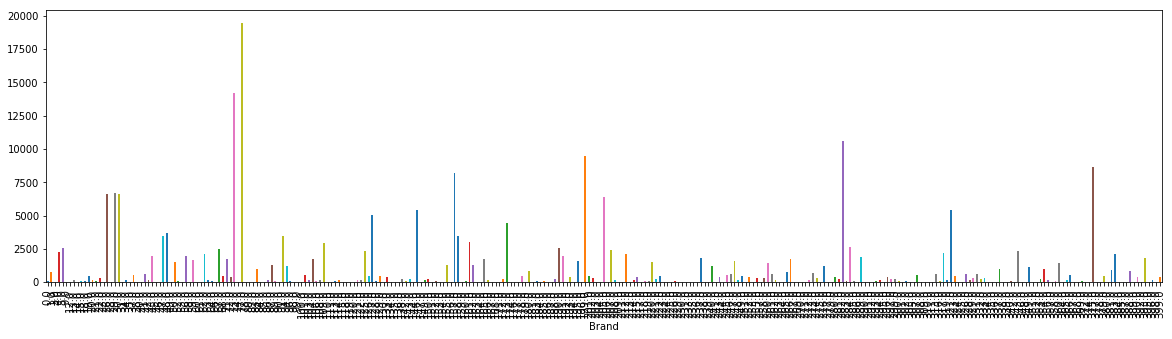

Brand
0.0        86
1.0       788
3.0        10
4.0      2246
5.0      2547
9.0        13
12.0        7
13.0      136
14.0        1
15.0      104
18.0       54
19.0      499
20.0      170
21.0       63
22.0      307
23.0        1
26.0     6590
28.0        3
29.0     6657
30.0     6623
31.0        1
34.0      200
35.0        1
37.0      514
38.0       48
40.0        5
41.0      650
42.0      135
43.0     1982
45.0       40
         ... 
357.0       9
358.0      61
360.0    1426
364.0      13
365.0     168
366.0     526
367.0      17
368.0      35
369.0      87
372.0       2
374.0      15
375.0    8627
377.0       9
378.0      33
379.0     496
380.0       1
381.0     936
383.0    2104
384.0      22
385.0       6
387.0      28
388.0     850
389.0      44
390.0     351
392.0       1
393.0    1851
395.0       9
396.0     169
398.0       1
399.0     380
Name: title, Length: 299, dtype: int64

In [8]:
#399 brands
fig = plt.figure(figsize = (20,5))
beauty_br.groupby(['Brand'])['title'].count().plot.bar(ylim = 0)
plt.show()
beauty_br.groupby('Brand')['title'].count()

In [9]:
#MultinomialNB

y = beauty_br['Brand']
X = beauty_br['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.93
#low recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.99
#high accuracy and recall for minority group 

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.98
#high accuracy and recall for minority group  

#Conclusion: LinearSVC has higher accuracy and recall (too many categories to verify)

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.50      0.03      0.06        32
        1.0       0.99      0.79      0.88       321
        4.0       0.57      0.40      0.47       908
        5.0       0.95      1.00      0.98      1001
        9.0       0.00      0.00      0.00         6
       12.0       0.00      0.00      0.00         3
       13.0       0.86      0.59      0.70        54
       15.0       1.00      0.77      0.87        35
       18.0       0.00      0.00      0.00        22
       19.0       1.00      0.80      0.89       200
       20.0       1.00      0.36      0.53        69
       21.0       1.00      0.03      0.06        33
       22.0       1.00      0.75      0.86       132
       23.0       0.00      0.00      0.00         1
       26.0       0.82      0.99      0.90      2565
       29.0       0.95      0.99      0.97      2616
       30.0       0.91      0.99      0.95      2581
       31.0       0.00      0.

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.44      0.44      0.44        32
        1.0       0.98      0.98      0.98       321
        4.0       0.79      0.77      0.78       908
        5.0       1.00      1.00      1.00      1001
        9.0       1.00      1.00      1.00         6
       12.0       1.00      1.00      1.00         3
       13.0       0.92      1.00      0.96        54
       15.0       1.00      0.97      0.99        35
       18.0       1.00      1.00      1.00        22
       19.0       0.99      0.99      0.99       200
       20.0       0.99      1.00      0.99        69
       21.0       1.00      1.00      1.00        33
       22.0       1.00      1.00      1.00       132
       23.0       0.00      0.00      0.00         1
       26.0       0.98      0.99      0.99      2565
       29.0       1.00      1.00      1.00      2616
       30.0       1.00      1.00      1.00      2581
       31.0       0.00      0.00   

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Random Forest Classifier
             precision    recall  f1-score   support

        0.0       0.38      0.41      0.39        32
        1.0       0.91      0.97      0.94       321
        3.0       0.00      0.00      0.00         0
        4.0       0.77      0.61      0.68       908
        5.0       0.99      1.00      0.99      1001
        9.0       1.00      0.83      0.91         6
       12.0       0.67      0.67      0.67         3
       13.0       0.88      0.98      0.93        54
       15.0       0.89      0.97      0.93        35
       18.0       0.85      1.00      0.92        22
       19.0       0.97      0.99      0.98       200
       20.0       0.93      0.99      0.96        69
       21.0       0.92      1.00      0.96        33
       22.0       0.95      1.00      0.97       132
       23.0       0.00      0.00      0.00         1
       26.0       0.97      0.99      0.98      2565
       28.0       0.00      0.00      0.00         0
       29.0       0.

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [10]:
A = beauty_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Brand'}, axis='columns')
beauty_test_2=pd.concat([beauty_test_1, new_1], axis=1)
beauty_test_2

,itemid,title,image_path,Benefits,Brand
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg,6.0,208.0
1,637234604,maybelline clear smooth all in one bb cream sp...,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg,6.0,282.0
2,690282890,murah innisfree eco natural green tea bb cream...,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg,1.0,205.0
3,930913462,loreal white perfect day cream spf 17 pa white...,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg,6.0,104.0
4,1039280071,hada labo cc cream ultimate anti aging spf 35 ...,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg,6.0,4.0
5,1327710392,cathy doll cc speed white powder pact spf 40 o...,beauty_image/e1e50828d5594721a7d5d5c1ff78afbd.jpg,6.0,37.0
6,1328802799,safi white natural brightening cream 45g,beauty_image/97ec852d5afc5d82ac02b80083cf292f.jpg,1.0,222.0
7,1330468145,light beige 03 bioaqua bb cushion exquisite de...,beauty_image/8ce1a5fe546f0cc795329bad599a8d5a.jpg,1.0,199.0
8,1677309730,new produk missha m perfect bb cream share in ...,beauty_image/755fcc85c687e8cb53d2a8d43ebfe251.jpg,1.0,91.0
9,1683142205,ready laneige bb cushion anti aging spf 50 pa,beauty_image/34b56398c099505c650cf2447dc9f21f.jpg,6.0,375.0


# 3. Colour_group

In [11]:
cg = ['title', 'Colour_group']
beauty_cg = beauty[cg]

#remove missing values
beauty_cg = beauty_cg[pd.notnull(beauty_cg['Colour_group'])]
beauty_cg = beauty_cg[['title', 'Colour_group']].sort_values('Colour_group')
beauty_cg_id = dict(beauty_cg.values)
beauty_cg.shape

(121324, 2)

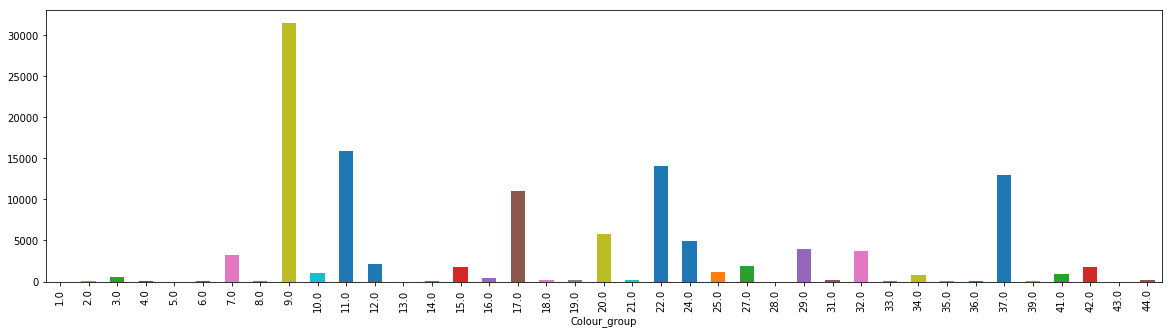

Colour_group
1.0        11
2.0        41
3.0       607
4.0        48
5.0        12
6.0        54
7.0      3181
8.0        86
9.0     31457
10.0      998
11.0    15912
12.0     2185
13.0        8
14.0       49
15.0     1833
16.0      383
17.0    11073
18.0      218
19.0      185
20.0     5782
21.0      148
22.0    14016
24.0     4943
25.0     1130
27.0     1884
28.0        5
29.0     4010
31.0      245
32.0     3760
33.0      110
34.0      855
35.0       72
36.0       97
37.0    12991
39.0       95
41.0      879
42.0     1766
43.0       17
44.0      178
Name: title, dtype: int64

In [12]:
fig = plt.figure(figsize = (20,5))
beauty_cg.groupby(['Colour_group'])['title'].count().plot.bar(ylim = 0)
plt.show()
beauty_cg.groupby('Colour_group')['title'].count()

In [13]:
#MultinomialNB

y = beauty_cg['Colour_group']
X = beauty_cg['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.79
#low accuracy and recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.87
#high accuracy and recall for minority group 

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.87
#high accuracy and recall for minority group  

#Conclusion: LinearSVC and RandomForest are comparable but LinearSVC has higher accuracy and recall in general

MULTINOMIAL NB
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.00      0.00      0.00        21
        3.0       0.97      0.63      0.76       233
        4.0       0.00      0.00      0.00        25
        5.0       0.00      0.00      0.00         6
        6.0       0.00      0.00      0.00        26
        7.0       0.94      0.82      0.88      1285
        8.0       0.00      0.00      0.00        23
        9.0       0.69      0.77      0.73     12591
       10.0       0.97      0.79      0.87       397
       11.0       0.70      0.84      0.77      6280
       12.0       0.94      0.74      0.82       840
       13.0       0.00      0.00      0.00         1
       14.0       0.00      0.00      0.00        27
       15.0       0.98      0.75      0.85       743
       16.0       0.88      0.13      0.23       168
       17.0       0.77      0.69      0.73      4487
       18.0       1.00      0.

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.94      0.71      0.81        21
        3.0       0.96      0.89      0.93       233
        4.0       0.91      0.84      0.87        25
        5.0       0.83      0.83      0.83         6
        6.0       0.94      0.58      0.71        26
        7.0       0.96      0.92      0.94      1285
        8.0       0.36      0.43      0.39        23
        9.0       0.78      0.86      0.82     12591
       10.0       0.99      0.93      0.96       397
       11.0       0.83      0.87      0.85      6280
       12.0       0.93      0.87      0.90       840
       13.0       1.00      1.00      1.00         1
       14.0       1.00      0.22      0.36        27
       15.0       0.98      0.88      0.93       743
       16.0       0.98      0.90      0.94       168
       17.0       0.83      0.80      0.82      4487
       18.0       0.75      0.51   

In [14]:
A = beauty_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Colour_group'}, axis='columns')
beauty_test_3=pd.concat([beauty_test_2, new_1], axis=1)
beauty_test_3

,itemid,title,image_path,Benefits,Brand,Colour_group
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg,6.0,208.0,22.0
1,637234604,maybelline clear smooth all in one bb cream sp...,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg,6.0,282.0,24.0
2,690282890,murah innisfree eco natural green tea bb cream...,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg,1.0,205.0,7.0
3,930913462,loreal white perfect day cream spf 17 pa white...,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg,6.0,104.0,22.0
4,1039280071,hada labo cc cream ultimate anti aging spf 35 ...,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg,6.0,4.0,9.0
5,1327710392,cathy doll cc speed white powder pact spf 40 o...,beauty_image/e1e50828d5594721a7d5d5c1ff78afbd.jpg,6.0,37.0,22.0
6,1328802799,safi white natural brightening cream 45g,beauty_image/97ec852d5afc5d82ac02b80083cf292f.jpg,1.0,222.0,22.0
7,1330468145,light beige 03 bioaqua bb cushion exquisite de...,beauty_image/8ce1a5fe546f0cc795329bad599a8d5a.jpg,1.0,199.0,11.0
8,1677309730,new produk missha m perfect bb cream share in ...,beauty_image/755fcc85c687e8cb53d2a8d43ebfe251.jpg,1.0,91.0,11.0
9,1683142205,ready laneige bb cushion anti aging spf 50 pa,beauty_image/34b56398c099505c650cf2447dc9f21f.jpg,6.0,375.0,9.0


# 4. Product_texture

In [15]:
pt = ['title', 'Product_texture']
beauty_pt = beauty[pt]

#remove missing values
beauty_pt = beauty_pt[pd.notnull(beauty_pt['Product_texture'])]
beauty_pt = beauty_pt[['title', 'Product_texture']].sort_values('Product_texture')
beauty_pt_id = dict(beauty_pt.values)
beauty_pt.shape

(244295, 2)

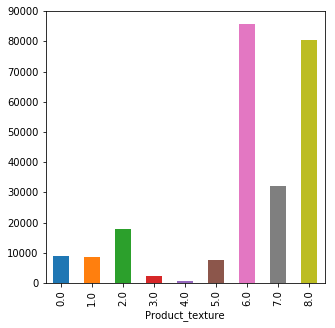

Product_texture
0.0     9051
1.0     8689
2.0    17859
3.0     2363
4.0      528
5.0     7577
6.0    85684
7.0    32167
8.0    80377
Name: title, dtype: int64

In [16]:
fig = plt.figure(figsize = (5,5))
beauty_pt.groupby(['Product_texture'])['title'].count().plot.bar(ylim = 0)
plt.show()
beauty_pt.groupby('Product_texture')['title'].count()

In [17]:
#MultinomialNB

y = beauty_pt['Product_texture']
X = beauty_pt['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.97
#lower accuracy and recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.99
#high accuracy and recall for minority group 

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.99
#high accuracy and recall for minority group  

#Conclusion: LinearSVC and RandomForest are comparable but LinearSVC has higher recall in minority group

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.97      0.96      0.97      3646
        1.0       0.96      0.95      0.96      3374
        2.0       0.90      0.96      0.93      7084
        3.0       0.97      0.88      0.92       915
        4.0       0.98      0.68      0.80       227
        5.0       0.95      0.92      0.94      3018
        6.0       0.99      0.97      0.98     34449
        7.0       0.98      0.99      0.98     12875
        8.0       0.97      0.98      0.98     32130

avg / total       0.97      0.97      0.97     97718
 

LinearSVC
             precision    recall  f1-score   support

        0.0       0.99      0.98      0.99      3646
        1.0       0.98      0.98      0.98      3374
        2.0       0.98      0.97      0.98      7084
        3.0       0.98      0.96      0.97       915
        4.0       1.00      0.96      0.98       227
        5.0       0.98      0.97      0.97      3018
        6.0    

In [18]:
A = beauty_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Product_texture'}, axis='columns')
beauty_test_4=pd.concat([beauty_test_3, new_1], axis=1)
beauty_test_4

,itemid,title,image_path,Benefits,Brand,Colour_group,Product_texture
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg,6.0,208.0,22.0,8.0
1,637234604,maybelline clear smooth all in one bb cream sp...,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg,6.0,282.0,24.0,8.0
2,690282890,murah innisfree eco natural green tea bb cream...,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg,1.0,205.0,7.0,8.0
3,930913462,loreal white perfect day cream spf 17 pa white...,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg,6.0,104.0,22.0,8.0
4,1039280071,hada labo cc cream ultimate anti aging spf 35 ...,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg,6.0,4.0,9.0,8.0
5,1327710392,cathy doll cc speed white powder pact spf 40 o...,beauty_image/e1e50828d5594721a7d5d5c1ff78afbd.jpg,6.0,37.0,22.0,6.0
6,1328802799,safi white natural brightening cream 45g,beauty_image/97ec852d5afc5d82ac02b80083cf292f.jpg,1.0,222.0,22.0,8.0
7,1330468145,light beige 03 bioaqua bb cushion exquisite de...,beauty_image/8ce1a5fe546f0cc795329bad599a8d5a.jpg,1.0,199.0,11.0,7.0
8,1677309730,new produk missha m perfect bb cream share in ...,beauty_image/755fcc85c687e8cb53d2a8d43ebfe251.jpg,1.0,91.0,11.0,8.0
9,1683142205,ready laneige bb cushion anti aging spf 50 pa,beauty_image/34b56398c099505c650cf2447dc9f21f.jpg,6.0,375.0,9.0,7.0


# 5. Skin_type

In [19]:
st = ['title', 'Skin_type']
beauty_st = beauty[st]

#remove missing values
beauty_st = beauty_st[pd.notnull(beauty_st['Skin_type'])]
beauty_st = beauty_st[['title', 'Skin_type']].sort_values('Skin_type')
beauty_st_id = dict(beauty_st.values)
beauty_st.shape
# many rows are null

(58410, 2)

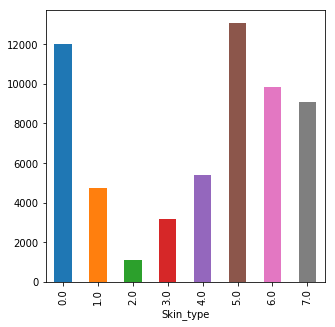

Skin_type
0.0    12025
1.0     4747
2.0     1104
3.0     3187
4.0     5379
5.0    13061
6.0     9830
7.0     9077
Name: title, dtype: int64

In [20]:
fig = plt.figure(figsize = (5,5))
beauty_st.groupby(['Skin_type'])['title'].count().plot.bar(ylim = 0)
plt.show()
beauty_st.groupby('Skin_type')['title'].count()

In [21]:
#MultinomialNB

y = beauty_st['Skin_type']
X = beauty_st['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.75
#lower accuracy and recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.82
#high accuracy and recall for minority group 

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.85
#high accuracy and recall for minority group  

#Conclusion: RandomForest has higher accuracy recall

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.70      0.71      0.70      4849
        1.0       0.73      0.57      0.64      1862
        2.0       0.51      0.54      0.52       469
        3.0       0.67      0.63      0.65      1256
        4.0       0.80      0.63      0.70      2128
        5.0       0.84      0.92      0.88      5222
        6.0       0.70      0.72      0.71      3941
        7.0       0.76      0.80      0.78      3637

avg / total       0.75      0.75      0.74     23364
 

LinearSVC
             precision    recall  f1-score   support

        0.0       0.77      0.79      0.78      4849
        1.0       0.75      0.71      0.73      1862
        2.0       0.74      0.59      0.66       469
        3.0       0.77      0.74      0.76      1256
        4.0       0.80      0.71      0.75      2128
        5.0       0.94      0.94      0.94      5222
        6.0       0.76      0.83      0.79      3941
        7.0    

In [22]:
A = beauty_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_test_rf = algo_rf.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_rf])
new=(df_from_arr.T)
new_1=new.rename({0:'Skin_type'}, axis='columns')
beauty_test_5=pd.concat([beauty_test_4, new_1], axis=1)
beauty_test_5

,itemid,title,image_path,Benefits,Brand,Colour_group,Product_texture,Skin_type
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg,6.0,208.0,22.0,8.0,6.0
1,637234604,maybelline clear smooth all in one bb cream sp...,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg,6.0,282.0,24.0,8.0,1.0
2,690282890,murah innisfree eco natural green tea bb cream...,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg,1.0,205.0,7.0,8.0,3.0
3,930913462,loreal white perfect day cream spf 17 pa white...,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg,6.0,104.0,22.0,8.0,7.0
4,1039280071,hada labo cc cream ultimate anti aging spf 35 ...,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg,6.0,4.0,9.0,8.0,7.0
5,1327710392,cathy doll cc speed white powder pact spf 40 o...,beauty_image/e1e50828d5594721a7d5d5c1ff78afbd.jpg,6.0,37.0,22.0,6.0,6.0
6,1328802799,safi white natural brightening cream 45g,beauty_image/97ec852d5afc5d82ac02b80083cf292f.jpg,1.0,222.0,22.0,8.0,0.0
7,1330468145,light beige 03 bioaqua bb cushion exquisite de...,beauty_image/8ce1a5fe546f0cc795329bad599a8d5a.jpg,1.0,199.0,11.0,7.0,1.0
8,1677309730,new produk missha m perfect bb cream share in ...,beauty_image/755fcc85c687e8cb53d2a8d43ebfe251.jpg,1.0,91.0,11.0,8.0,7.0
9,1683142205,ready laneige bb cushion anti aging spf 50 pa,beauty_image/34b56398c099505c650cf2447dc9f21f.jpg,6.0,375.0,9.0,7.0,7.0


In [23]:
export_csv = beauty_test_5.to_csv (r'C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/beauty_data_info_val_competition_finalised.csv', index = None, header=True) 